In [125]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#creating a start date and end date
start = '2017-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#creating the dataframe
df= data.DataReader('TSLA', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2017-01-03  14.688667  14.064000  14.324000  14.466000   88849500.0  14.466000
2017-01-04  15.200000  14.287333  14.316667  15.132667  168202500.0  15.132667
2017-01-05  15.165333  14.796667  15.094667  15.116667   88675500.0  15.116667
2017-01-06  15.354000  15.030000  15.128667  15.267333   82918500.0  15.267333
2017-01-09  15.461333  15.200000  15.264667  15.418667   59692500.0  15.418667
                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-12-02  196.250000  191.110001  191.779999  194.860001  73533400.0   
2022-12-05  191.270004  180.550003  189.440002  182.449997  93122700.0   
2022-12-06  183.649994  175.330002  181.220001  179.820007  92150800.0   
2022-12-07  179.380005  172.220001  175.029999  174.039993  84213300.0   
202

(1495, 6)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1495 entries, 2017-01-03 to 2022-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1495 non-null   float64
 1   Low        1495 non-null   float64
 2   Open       1495 non-null   float64
 3   Close      1495 non-null   float64
 4   Volume     1495 non-null   float64
 5   Adj Close  1495 non-null   float64
dtypes: float64(6)
memory usage: 81.8 KB
(1495, 6)


<AxesSubplot: xlabel='Date'>

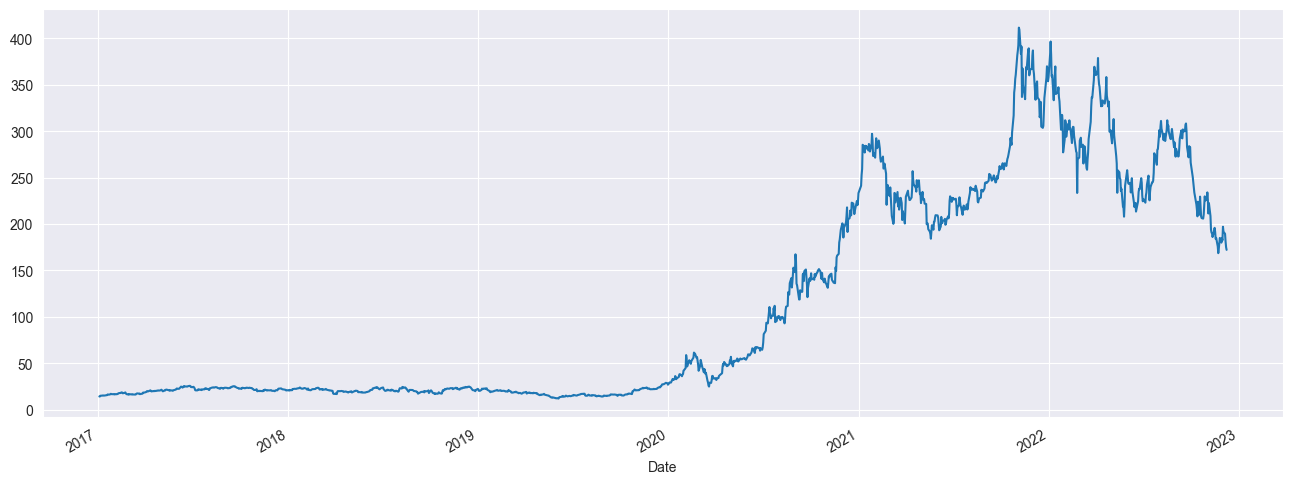

In [126]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

df['Open'].plot(figsize=(16,6))

In [127]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,14.688667,14.064000,14.324000,14.466000,88849500.0
1,15.200000,14.287333,14.316667,15.132667,168202500.0
2,15.165333,14.796667,15.094667,15.116667,88675500.0
3,15.354000,15.030000,15.128667,15.267333,82918500.0
4,15.461333,15.200000,15.264667,15.418667,59692500.0


In [128]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers].pop('Close')

print(x.shape)
print(y.shape)

from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(x)

train_header_array

X_train, X_test, y_train, y_test = train_test_split(train_header_array,y, test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(1495, 4)
(1495,)
(1046, 4)
(449, 4)


In [129]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

The coefficient of the model is  [ 338.82849575  320.72122089 -262.53827011    1.12731878]
The intercept of the model is  12.091531555967663


In [130]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

print(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

[ 21.04329815  20.26889253 301.23278447  18.82837202 142.09155847
  80.04977257 136.04989083 248.15675994 243.53308403  19.1324957
  15.23673873  24.5124737  396.33647335  22.33407466  15.37070126
 217.16333655  23.21240731 141.41393786 227.13396257  21.44281623
 237.81176319 283.35189658 220.70571451 249.43115053  22.74512637
 193.5755939  346.99133126 148.65740872 262.84021292  47.67027219
 308.82384959  22.02869802  32.34779519 147.48879798  20.58557866
 266.45945506  27.21102552  16.32900547  16.96998302 246.2430613
 139.84057306  18.56150834  16.19755924  16.52663728 107.02038124
  16.38503605 297.4865391  106.26459767 409.16260154  23.56757036
 298.71240842 358.21026238 142.22368579  24.27498658 223.54712708
 218.21121912  22.15603992 200.48097413  18.70914141  14.33468039
 221.98158983 272.30346536  17.94533819  21.27262334 350.9210694
  20.71591018  22.56670888  18.97892333 235.78900796  20.13088923
  36.99532042  17.26732599 162.88316964  18.94997164 197.91354854
  38.94637986

In [131]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
91       21.058666        21.043298
75       20.373333        20.268893
1210    303.226654       301.232784
330      19.032000        18.828372
961     141.559998       142.091558
...            ...              ...
494      22.198000        22.654031
581      15.676000        15.925512
154      24.253332        24.341752
643      15.254667        15.509077
774      43.371334        43.172604

[449 rows x 2 columns]


In [132]:
dfr.head(10)

,Actual Price,Predicted Price
91,21.058666,21.043298
75,20.373333,20.268893
1210,303.226654,301.232784
330,19.032000,18.828372
961,141.559998,142.091558
880,80.577332,80.049773
930,139.873337,136.049891
1076,244.076660,248.156760
1378,245.706665,243.533084
335,18.963333,19.132496


<AxesSubplot: >

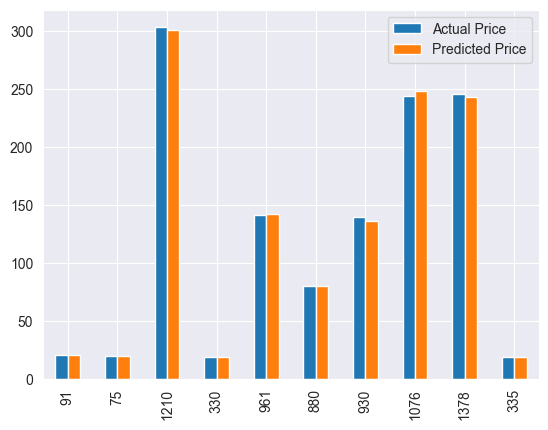

In [133]:
graph=dfr.head(10)
graph.plot(kind='bar')

In [134]:
rgr.predict([[269.06, 263.2800, 254.5376, 6189026]])

array([7085796.12790502])